<a href="https://colab.research.google.com/github/PedroC-dev/RelatorioAtividadesPDI/blob/main/filtragem_espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

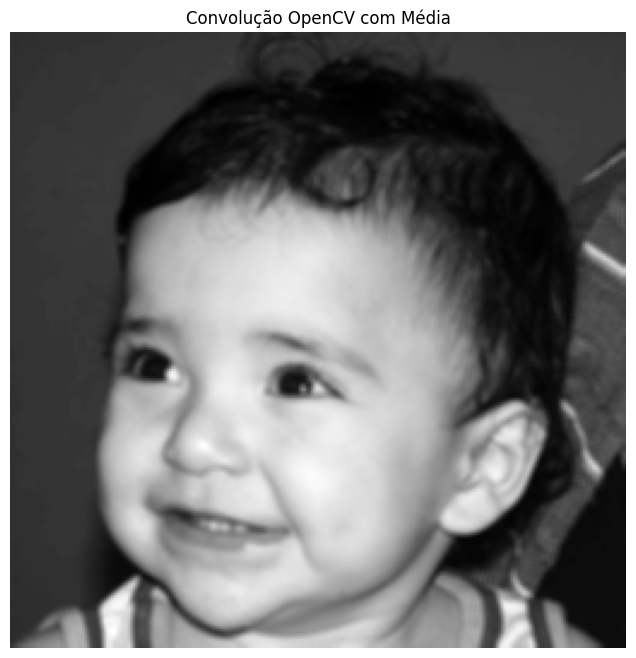

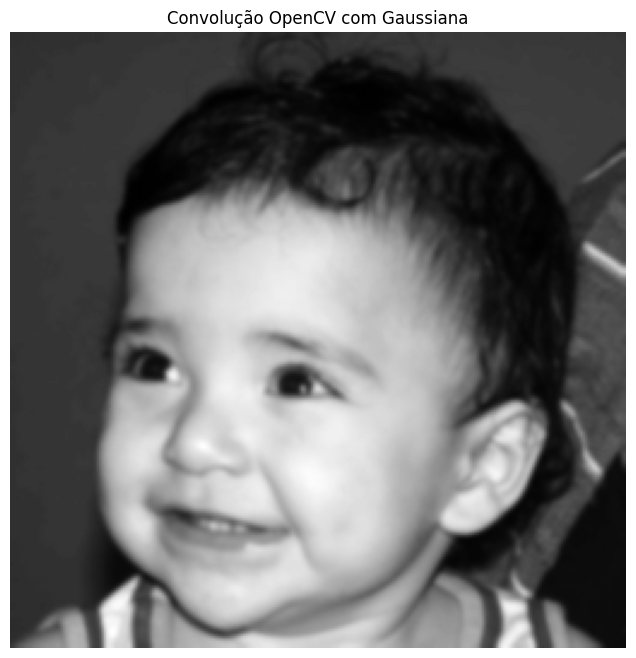

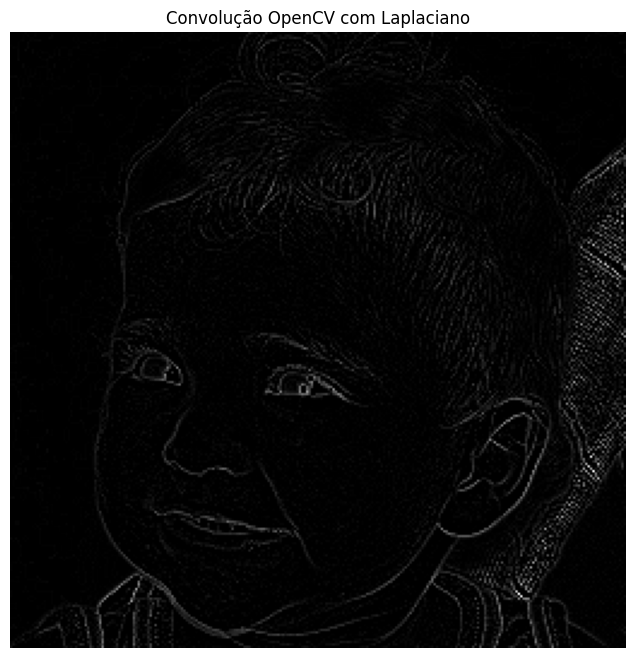

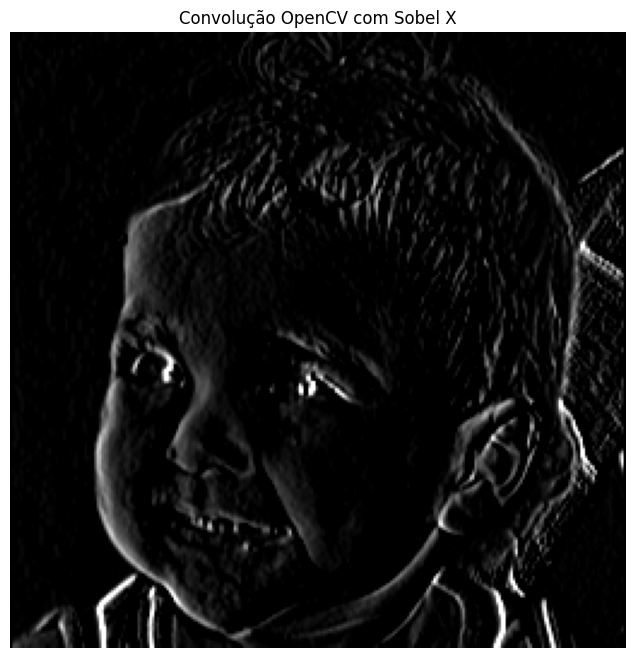

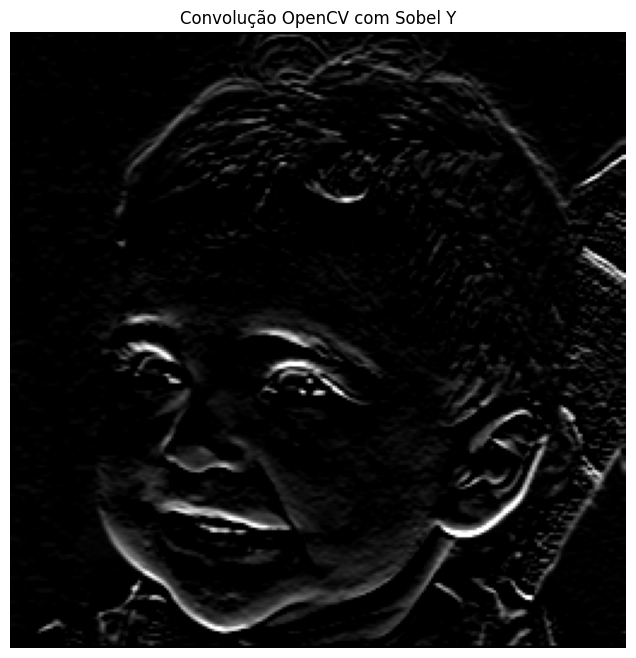

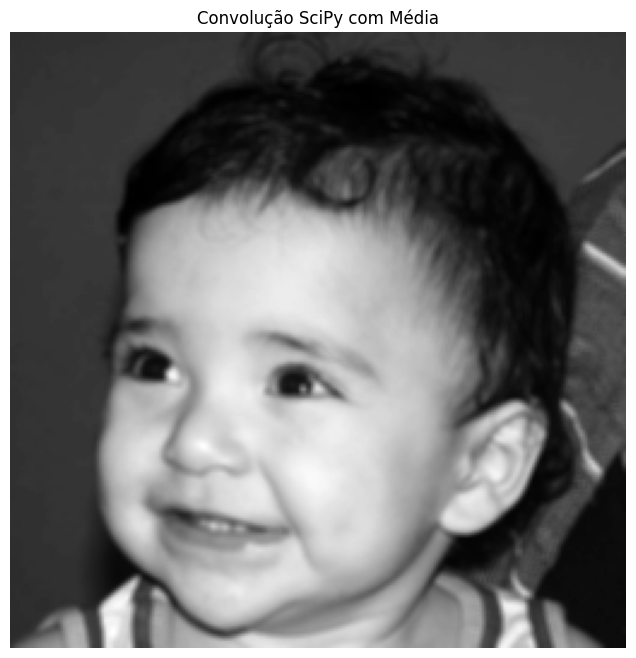

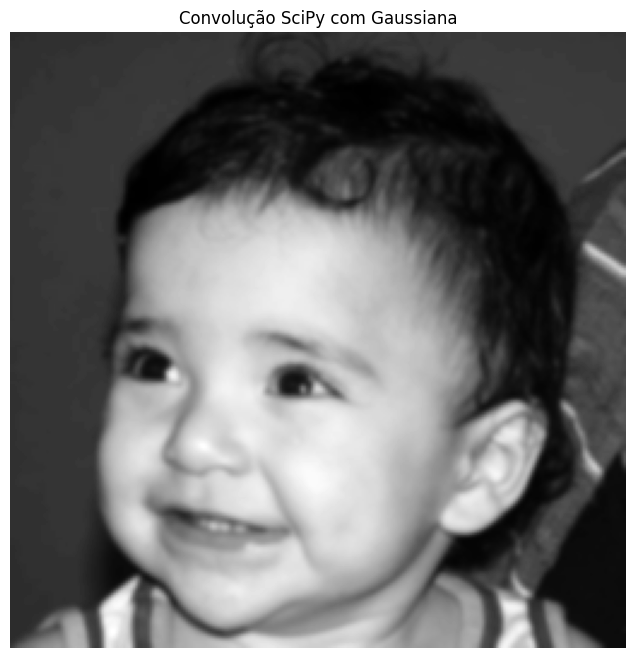

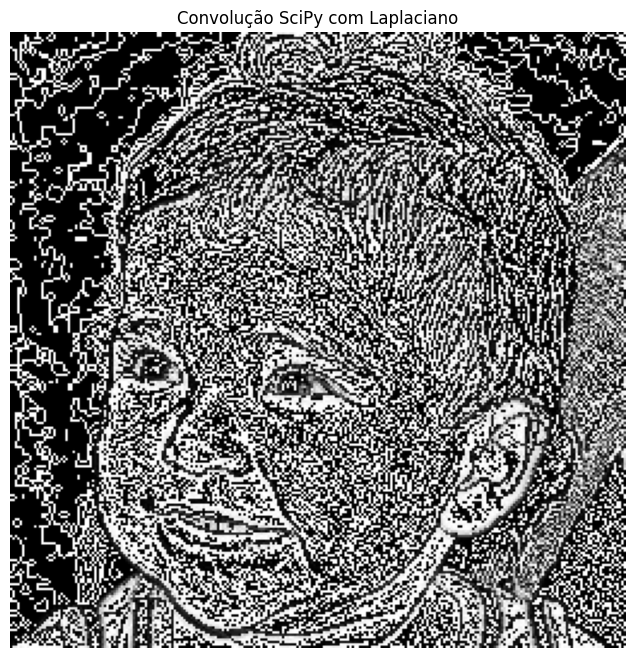

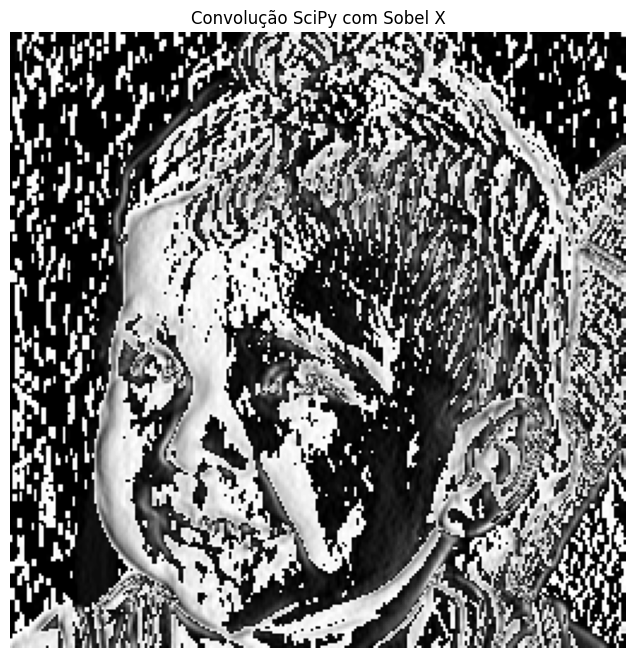

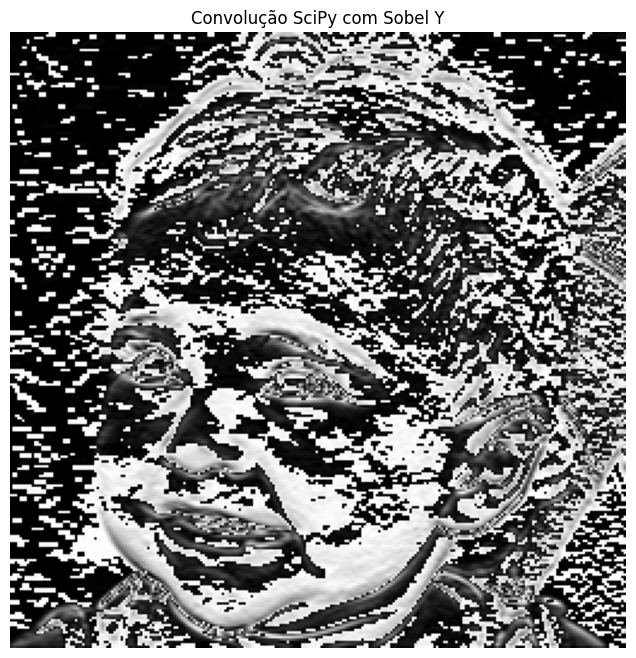

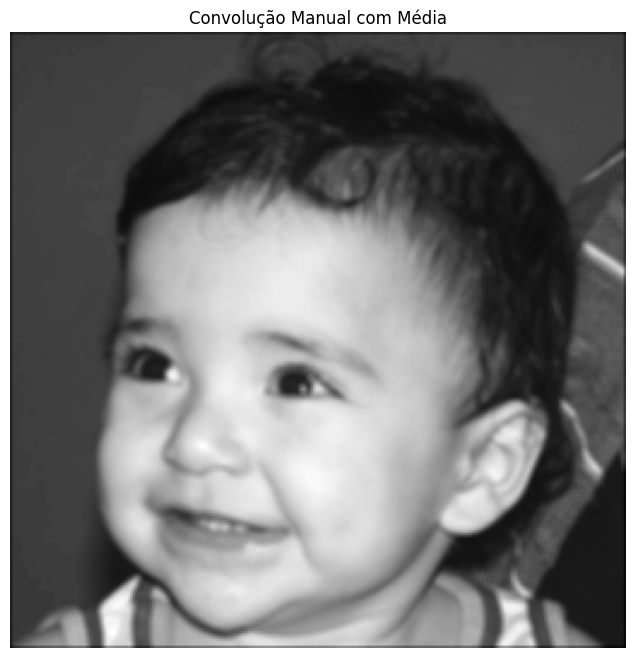

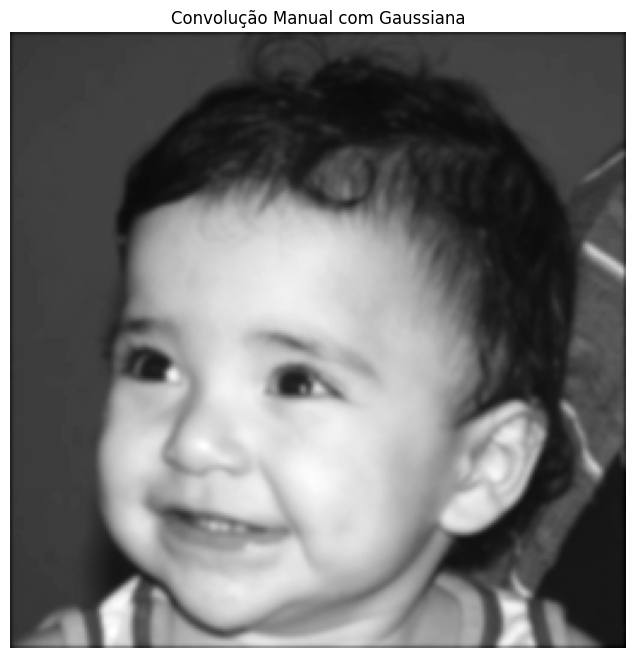

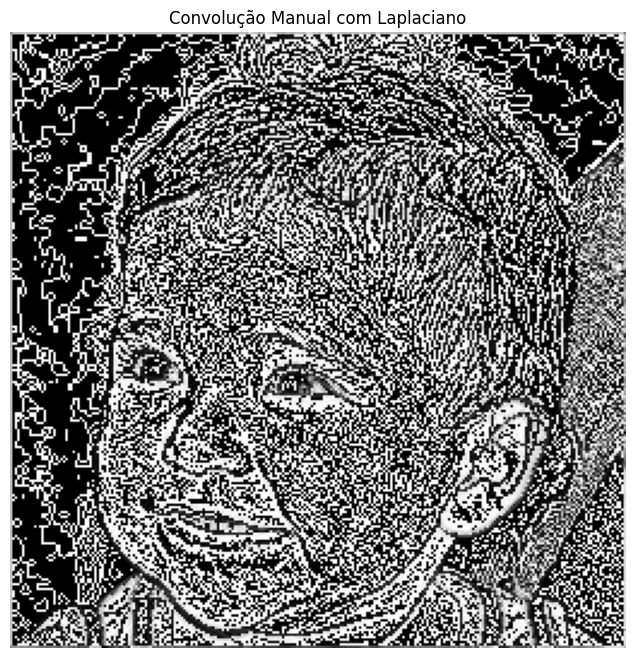

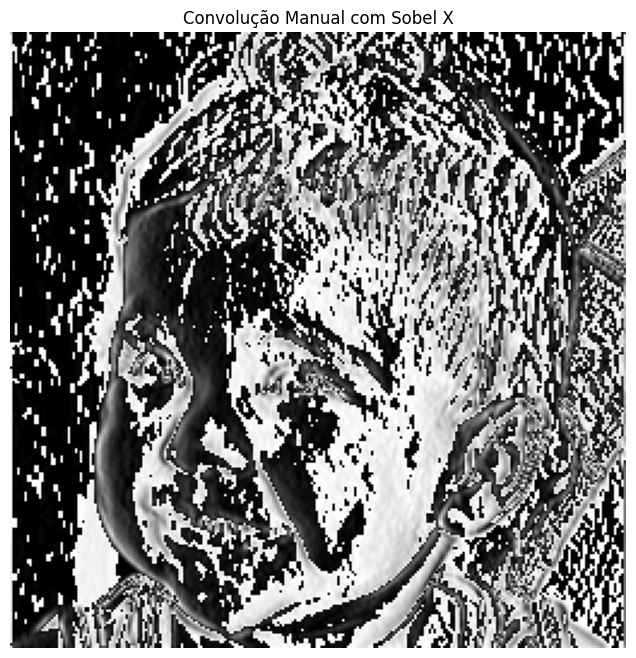

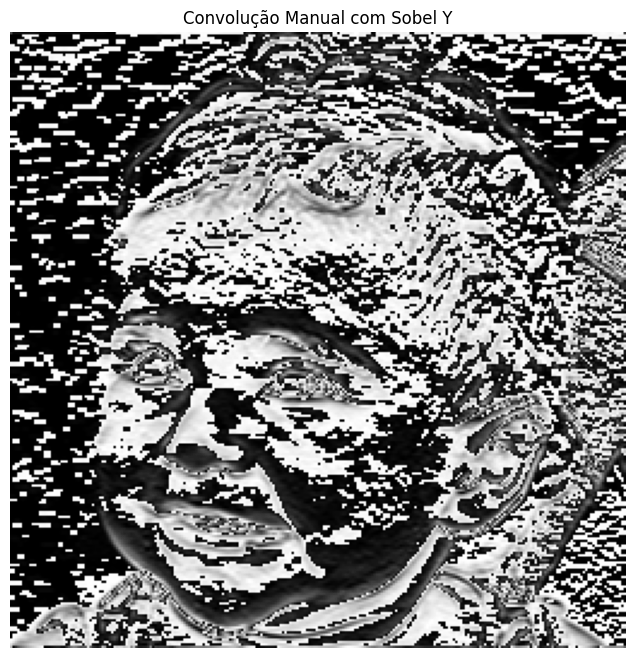

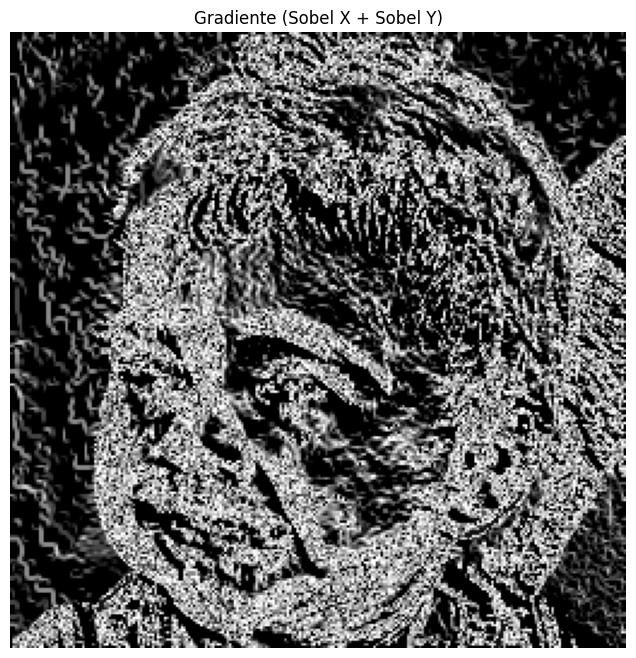

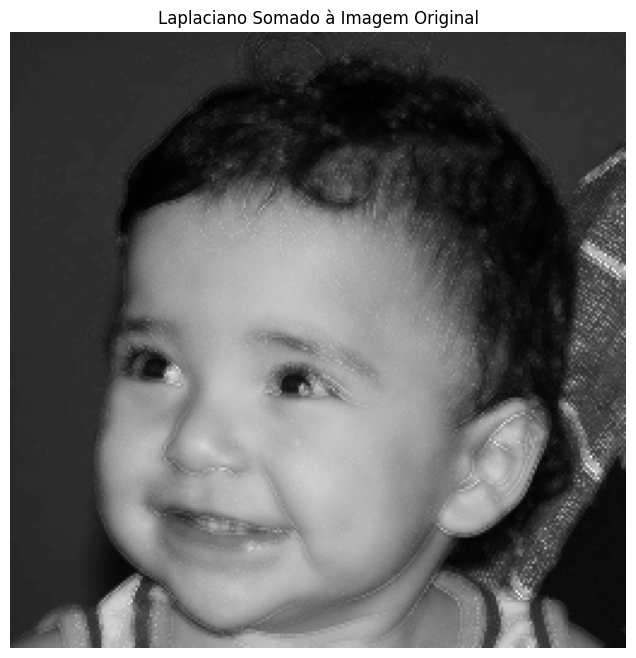

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve as scipy_convolve

# 1. Função para carregar imagens
def carregar_imagens():
    # Carregar imagem em tons de cinza
    img_cinza = cv2.imread('biel.png', cv2.IMREAD_GRAYSCALE)
    return img_cinza

# 2. Função para aplicar convolução com OpenCV
def convolucao_opencv(imagem, kernel):
    return cv2.filter2D(imagem, -1, kernel)

# 3. Função para aplicar convolução com SciPy
def convolucao_scipy(imagem, kernel):
    return scipy_convolve(imagem, kernel)

# 4. Função para aplicar convolução manualmente
def convolucao_manual(imagem, kernel):
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h // 2
    pad_w = kernel_w // 2
    imagem_padded = np.pad(imagem, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    resultado = np.zeros_like(imagem)

    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            resultado[i, j] = np.sum(imagem_padded[i:i + kernel_h, j:j + kernel_w] * kernel)

    return resultado

# 5. Máscaras de convolução
def mascara_media():
    return np.ones((3, 3), np.float32) / 9

def mascara_gaussiana(sigma=1):
    tamanho = int(2 * np.ceil(2 * sigma) + 1)
    gauss = cv2.getGaussianKernel(tamanho, sigma)
    return gauss @ gauss.T

def mascara_laplaciano():
    return np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

def mascara_sobel_x():
    return np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

def mascara_sobel_y():
    return np.array([[1, 2, 1],
                     [0, 0, 0],
                     [-1, -2, -1]])

# 6. Função para calcular o gradiente
def calcular_gradiente(img_sobel_x, img_sobel_y):
    return np.sqrt(img_sobel_x**2 + img_sobel_y**2).astype(np.uint8)

# 7. Função para mostrar imagens
def mostrar_imagens(imagens, titulos, em_cinza=True):
    plt.figure(figsize=(12, 8))
    for i, (imagem, titulo) in enumerate(zip(imagens, titulos)):
        plt.subplot(1, len(imagens), i + 1)
        if em_cinza:
            plt.imshow(imagem, cmap="gray")
        else:
            plt.imshow(imagem)
        plt.title(titulo)
        plt.axis('off')
    plt.show()

# 8. Execução principal
def principal():
    # Carregar a imagem
    img_cinza = carregar_imagens()

    # Definir as máscaras
    kernels = {
        'Média': mascara_media(),
        'Gaussiana': mascara_gaussiana(sigma=1),
        'Laplaciano': mascara_laplaciano(),
        'Sobel X': mascara_sobel_x(),
        'Sobel Y': mascara_sobel_y(),
    }

    # Aplicar as operações de convolução
    img_convolucoes_opencv = {titulo: convolucao_opencv(img_cinza, kernel) for titulo, kernel in kernels.items()}
    img_convolucoes_scipy = {titulo: convolucao_scipy(img_cinza, kernel) for titulo, kernel in kernels.items()}
    img_convolucoes_manual = {titulo: convolucao_manual(img_cinza, kernel) for titulo, kernel in kernels.items()}

    # Calcular o gradiente
    gradiente = calcular_gradiente(img_convolucoes_opencv['Sobel X'], img_convolucoes_opencv['Sobel Y'])

    # Adicionar Laplaciano à imagem original
    laplaciano_com_imagem = cv2.add(img_cinza, img_convolucoes_opencv['Laplaciano'])

    # Exibir imagens convoluídas
    for titulo, img in img_convolucoes_opencv.items():
        mostrar_imagens([img], [f'Convolução OpenCV com {titulo}'])

    for titulo, img in img_convolucoes_scipy.items():
        mostrar_imagens([img], [f'Convolução SciPy com {titulo}'])

    for titulo, img in img_convolucoes_manual.items():
        mostrar_imagens([img], [f'Convolução Manual com {titulo}'])

    # Exibir gradiente
    mostrar_imagens([gradiente], ['Gradiente (Sobel X + Sobel Y)'])

    # Exibir Laplaciano somado à imagem original
    mostrar_imagens([laplaciano_com_imagem], ['Laplaciano Somado à Imagem Original'])

if __name__ == "__main__":
    principal()
